# 5 - Feature Selection

## Introduction:

One of the most common problem in a dataset is __Noise__. Noise are features within the dataset that may not be highly predictive of the response variable, and in some cases will hinder the ML model's performance. There are techniques that can be employed to deal with the Noise to a certain degree, as done in previous projects, this woud include standardisation and normalisation. However, these two techniques does not directly deal with the Noise in the data. 

This is where __Feature Selection__ comes into play, where it is the process of selecting features from the original batch of features from the dataset, that produces the best model prediction outcome in a pipeline. Formally, this can be described as, given "n" number of features, search a subset "k" features, where "k < n", that improves thhe ML modeling pipeline.

This project will venture into 2 sections:
1. Statistical-based feature selection
2. Model-based feature selection.

## Breakdown of this Project:
- How to gain better performance with feature engineering.
- Creating a baseline ML modeling pipeline.
- Types of Feature Selection.
- Choosing the right feature selection method. 

## Datasets:

Link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Dataset Description: This dataset consists of customer's default payments in Taiwan.

Attribute Information:

The target variable is binary, default payment (Yes = 1, No = 0).

There are 23 feature (attribute) variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Requirements:
- sklearn (scikit-learn)
- numpy
- pandas
- os
- timeit
- seaborn
 



In [1]:
import pandas as pd
import numpy as np
import timeit
import os
import seaborn as sns

## 1 - How to gain better performance with feature engineering?

In previous projects, tthe accuracy or RSME metrics of the model predictions were used to measure its performance. There are of course othehr metircs that can be utilised and to name a few, these are:

For classification tasks:
1. True and False Positive rates.
2. Sensitivity (TP rate) and specificity.
3. False negatives and False positve rate.

For Regression tasks:
1. Mean Absolute Error.
2. R-squared.

An alternative to model performance metrics are the Meta-Metrics, such as:
- Time taken to train the model to the dataset.
- Time taken for a fitted model to predict on new instances of the data.
- The size of the data that is persisted.

### 1.1 - Metric Tracking:

To help track these metrics bettwe, define a function to evaluate on several model's performance, and it should be specific enough to provide metrics for each individual model.

In [2]:
# Import the required libraries:
from sklearn.model_selection import GridSearchCV

In [3]:
def get_best_model_and_accuracy(model, params, X, y):
    """ This function will run the model with its set parameters, with the dataset.
        It does so by using sklearn's GridSearchCV.
    Parameters:
        - model, is the input model to be used.
        - params, is the Dict of parameters for the model
        - X, is the training dataset.
        - y, is the target variable.
    Returns:
        - returns the Best Accuracy, Best Parameters used, Average time to fit and Average time to Score.
    """
    # Define the GridSearchCV:
    grid = GridSearchCV(estimator=model, param_grid=params, error_score=0., n_jobs=-1)
    
    # Fit the model to the dataset:
    grid.fit(X, y)
    
    # Classical metric for performance:
    print("Best Accuracy: {}".format(grid.best_score_))
    
    # Best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    
    # Average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 
                                                     ndigits=3)))
    
    # Average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 
                                                       ndigits=3)))

### 1.2 - Credit Card Defaulting Dataset:

Throughout this project, the important features will be extracted and the noise will be ignored, therefore the goals are:
1. __Improving the model performance__ - Removing irrelevant data and redundant data to reduce the noise, providing (as best as possible) the best features for the model to learn from.
2. __Reducing training time and prediction time__ - By fitting pipelines to less data at each stage, it will result in a better model fit and prediction times. This means the pipelines will be faster overall.

## 2 - Load in the Dataset:

In [4]:
# Define the Working Directory for the Dataset:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + "/Dataset/"

# Load in the dataset:
credit_card_default_dataset_df = pd.read_csv(path_to_dataset + 'credit_card_default.csv')

### 2.1 - First glance at the dataset:

In [5]:
# Inspect:
credit_card_default_dataset_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Inspect the shape:
credit_card_default_dataset_df.shape

(30000, 24)

### 2.2 - Dataset Statistics:

In [7]:
credit_card_default_dataset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


It can be seen that the scales for each column are different from each other, this meant that Standardisation and Normalisation will be required. However, in this project, this will be ignored for now.

### 2.4 - Check for Missing Values:

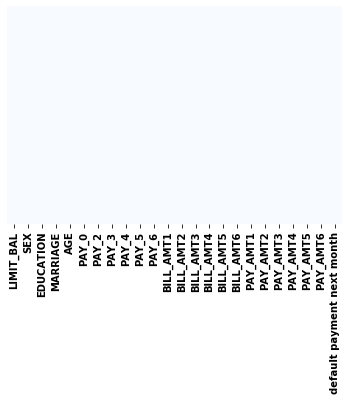

In [8]:
sns.heatmap(data=credit_card_default_dataset_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

Looks like there aren't any missing values so far.

### 2.5 - Set up the Dataset with Features and Target Variable(s):

Here, the Response (Target) Variable is "default payment next month". The rest will be used as the features.

In [9]:
# For the Features:
X_features_credit = credit_card_default_dataset_df.drop('default payment next month', axis=1)

# For the Target variable:
y_target_credit = credit_card_default_dataset_df['default payment next month']

## 3 - Creating the baseline ML Pipeline:

Let's firstly determine the NULL Accuracy:

In [10]:
y_target_credit.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

The NULL Accuracy here is 77.88%. This would be the accuracy to beat.

## 3.1 - Baseline ML Pipeline setup:

Here, there will be 4 types of ML models being employed and these are:
1. Logistic Regression.
2. K-Nearest Neighbours.
3. Decision Trees.
4. Random Forest.

In [11]:
# Import the required libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Next, is to run each one of these models and obtain a baseline metrics: accuracy and so on.

In [12]:
# Define the parameters for each of the models:
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}

knn_params = {'n_neighbors': [1, 3, 5, 7]}

tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}

In [13]:
# Instantiate the models:
logReg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
randomForest = RandomForestClassifier()

#### For Logistic Regression:

In [14]:
get_best_model_and_accuracy(model=logReg, 
                            params=lr_params, 
                            X=X_features_credit, 
                            y=y_target_credit)

Best Accuracy: 0.7787666666666667
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Average Time to Fit (s): 0.512
Average Time to Score (s): 0.001


#### For KNN:

In [15]:
get_best_model_and_accuracy(model=knn, 
                            params=knn_params, 
                            X=X_features_credit, 
                            y=y_target_credit)

Best Accuracy: 0.7617333333333333
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.247
Average Time to Score (s): 0.923


#### For Decision Tree:

In [16]:
get_best_model_and_accuracy(model=decision_tree, 
                            params=tree_params, 
                            X=X_features_credit, 
                            y=y_target_credit)

Best Accuracy: 0.8206333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.343
Average Time to Score (s): 0.002


#### For Random Forest:

In [17]:
get_best_model_and_accuracy(model=randomForest, 
                            params=forest_params, 
                            X=X_features_credit, 
                            y=y_target_credit)

Best Accuracy: 0.8202
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Average Time to Fit (s): 1.614
Average Time to Score (s): 0.033


Now that all the baseline metrics for each of the model have been estalished, a more



In [18]:
break

SyntaxError: 'break' outside loop (<ipython-input-18-6aaf1f276005>, line 4)

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 